In [208]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [209]:
df = pd.read_csv(r"D:\STUDY\MACHINE_LEARNING\4 ridge lasso and elastic net\Algerian_forest_fires_dataset.csv")

In [210]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [211]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [212]:
df=df.drop(['day','month', 'year'],axis=1)

In [213]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [214]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,245,245,245,245,245,245,245,245,245,245,244
unique,20,63,19,40,174,167,199,107,175,127,9
top,35,55,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,29,10,43,133,8,5,5,8,5,12,131


In [215]:
df["Classes  "].value_counts()

Classes  
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: count, dtype: int64

In [216]:
df['Classes  ']=np.where(df['Classes  '].str.contains("not fire"),0,1)

In [217]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0


In [218]:
df["Classes  "].value_counts()

Classes  
1    138
0    109
Name: count, dtype: int64

In [219]:
print(df.isnull().sum())

Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        0
dtype: int64


In [220]:
df = df.dropna()


In [221]:
df.isnull().sum()

Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [222]:
df=df.apply(pd.to_numeric , errors="coerce")

In [223]:
df.isnull().sum()

Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             2
ISI            1
BUI            1
FWI            2
Classes        0
dtype: int64

In [224]:
df=df.dropna()

In [225]:
df.isnull().sum()

Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [226]:
x=df.drop("FWI",axis=1)
y=df["FWI"]

In [227]:
x.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,-0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.586639
Classes,0.516015,-0.432161,-0.069964,-0.379097,0.769492,0.585658,0.511123,0.735197,0.586639,1.000000


In [228]:
print(x.shape,y.shape)

(243, 10) (243,)


In [229]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0


<Axes: >

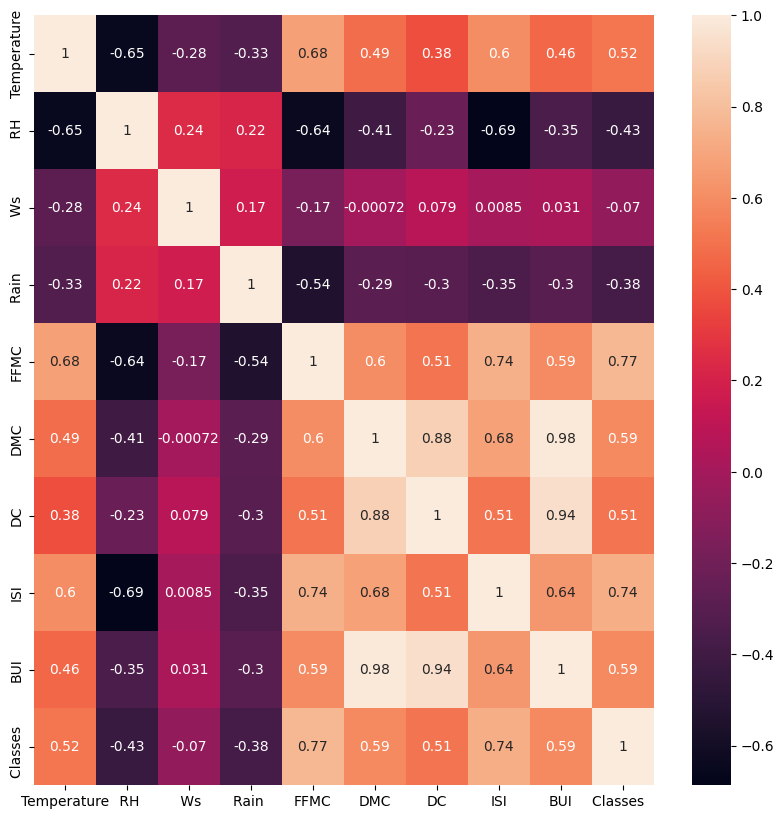

In [230]:
plt.figure(figsize=(10,10))
corr=x.corr()
sns.heatmap(corr, annot=True)

In [231]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [232]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)


In [233]:
print(x_train_scaled)

[[-0.87563202  0.21321832  1.28577038 ... -0.79648833 -0.76790976
  -1.14434427]
 [ 0.22209084 -1.65484925  0.14504117 ...  1.88757476  3.10086694
   0.8738629 ]
 [ 1.5942444  -1.25454906 -0.99568804 ... -0.19488798 -0.24276653
   0.8738629 ]
 ...
 [-1.97335488  0.947102    0.52528424 ... -1.0972885  -1.03380506
  -1.14434427]
 [ 0.49652155 -0.18708188  0.14504117 ...  0.56868169  0.14278167
   0.8738629 ]
 [-0.60120131  1.0138187   2.04625653 ... -0.88904223 -0.99392076
  -1.14434427]]


Text(0.5, 1.0, 'X_train After Scaling')

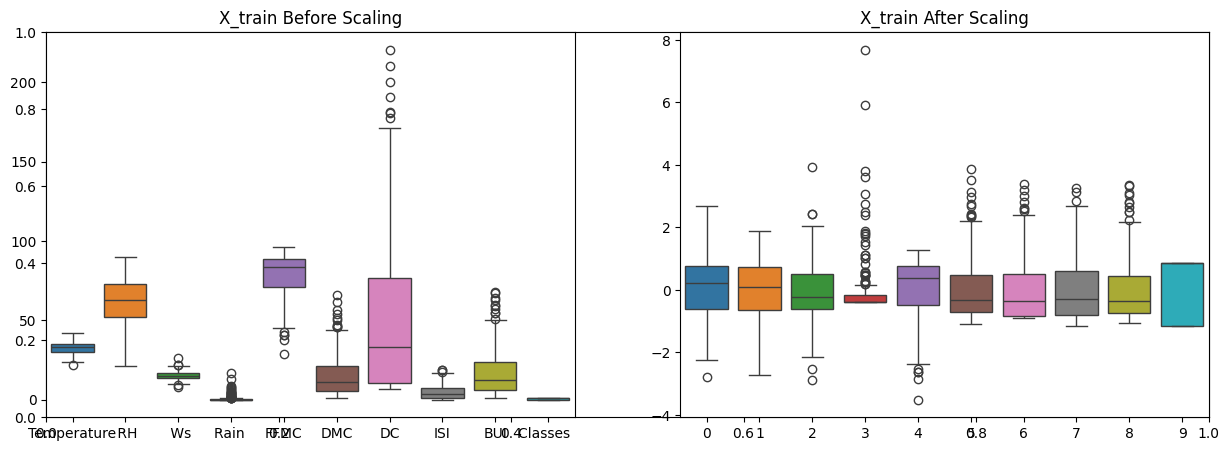

In [234]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=x_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=x_train_scaled)
plt.title('X_train After Scaling')


In [235]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)
print("mean absoloute error is ",mae)
print("r2 score is ", score)


mean absoloute error is  2.448416568786665
r2 score is  0.6897528422303427


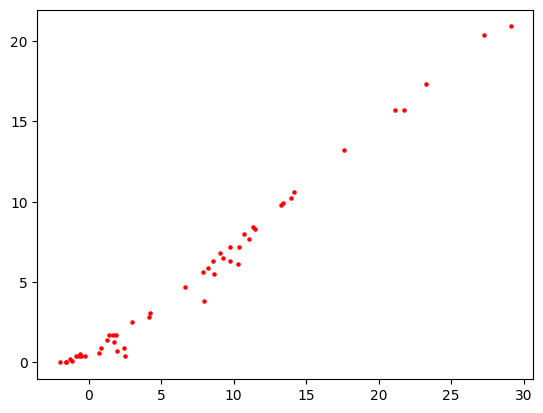

In [236]:
plt.scatter(y_pred,y_test, color="red", label="Actual vs Predicted",s=5)


mean absoloute error is  2.147226582859954
r2 score is  0.8058202016842166


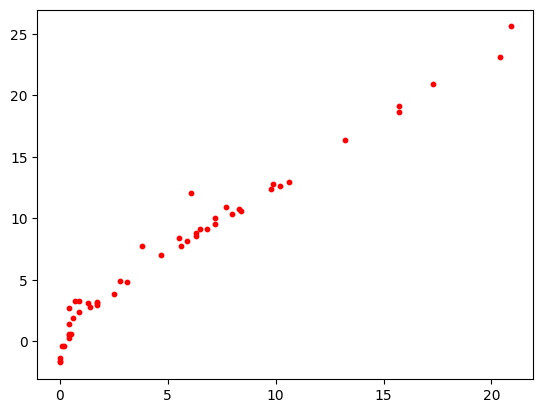

In [237]:
from sklearn.linear_model import Lasso
lasso= Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred_lasso=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred_lasso)
score=r2_score(y_test,y_pred_lasso)
print("mean absoloute error is ",mae)
print("r2 score is ", score)
plt.scatter(y_test, y_pred_lasso, color='red', s=10, label='Predicted vs Actual')  # s is the size of points




In [238]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [239]:
print(lassocv.alpha_)

0.05413528964633573


In [240]:
lassocv.alphas_

array([7.1563667 , 6.67405153, 6.2242428 , 5.80474966, 5.41352896,
       5.04867523, 4.70841142, 4.39108025, 4.09513613, 3.81913766,
       3.56174057, 3.32169117, 3.09782031, 2.88903759, 2.69432612,
       2.51273756, 2.34338746, 2.18545099, 2.0381589 , 1.90079382,
       1.77268667, 1.65321353, 1.54179247, 1.43788081, 1.34097246,
       1.2505954 , 1.16630946, 1.08770411, 1.01439649, 0.94602956,
       0.88227033, 0.82280827, 0.76735374, 0.71563667, 0.66740515,
       0.62242428, 0.58047497, 0.5413529 , 0.50486752, 0.47084114,
       0.43910802, 0.40951361, 0.38191377, 0.35617406, 0.33216912,
       0.30978203, 0.28890376, 0.26943261, 0.25127376, 0.23433875,
       0.2185451 , 0.20381589, 0.19007938, 0.17726867, 0.16532135,
       0.15417925, 0.14378808, 0.13409725, 0.12505954, 0.11663095,
       0.10877041, 0.10143965, 0.09460296, 0.08822703, 0.08228083,
       0.07673537, 0.07156367, 0.06674052, 0.06224243, 0.0580475 ,
       0.05413529, 0.05048675, 0.04708411, 0.0439108 , 0.04095

In [241]:
lassocv.mse_path_

array([[68.58934997, 64.28650232, 49.25415197, 79.11474083, 38.68688171],
       [63.2664675 , 58.77362304, 43.20292636, 77.07183352, 34.66910628],
       [56.87389457, 51.79652473, 37.15764773, 69.4806422 , 31.16497557],
       [51.2737596 , 45.69461734, 31.98560721, 62.80993539, 27.46286399],
       [45.36816855, 40.35928545, 27.56726322, 56.94442062, 23.75447628],
       [39.875005  , 35.69250404, 23.79907917, 50.31847875, 20.54655878],
       [35.0794232 , 31.60885664, 20.59132915, 44.35263414, 17.77349727],
       [30.89154006, 28.0342798 , 17.86626498, 39.14265375, 15.37720198],
       [27.23334321, 24.90389594, 15.55674604, 34.59116894, 13.30754905],
       [24.03652419, 22.16129069, 13.60451947, 30.61376519, 11.52101422],
       [21.24273995, 19.75730052, 11.95924131, 27.13693185,  9.97950732],
       [18.80004176, 17.64896267, 10.57738151, 24.09623192,  8.65087048],
       [16.66356323, 15.79916526,  9.42117661, 21.43679316,  7.50627555],
       [14.79422393, 14.17520895,  8.4

In [242]:
len(lassocv.mse_path_)

100

Mean absolute error 2.4509485652070753
R2 Score 0.6993468642490008


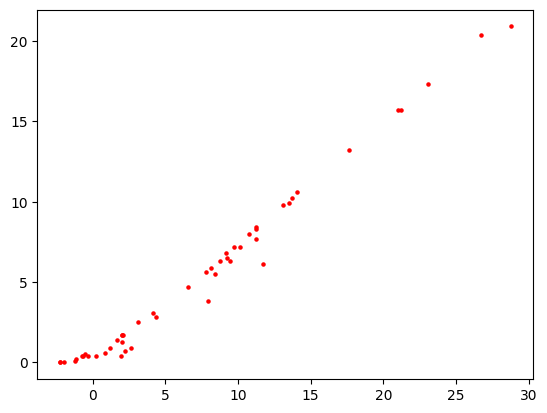

In [243]:
y_pred=lassocv.predict(x_test_scaled)
mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_pred, y_test , color="red" , s=5)

In [244]:
from sklearn.linear_model import Ridge

Mean absolute error 2.4045582330813677
R2 Score 0.698172437322643


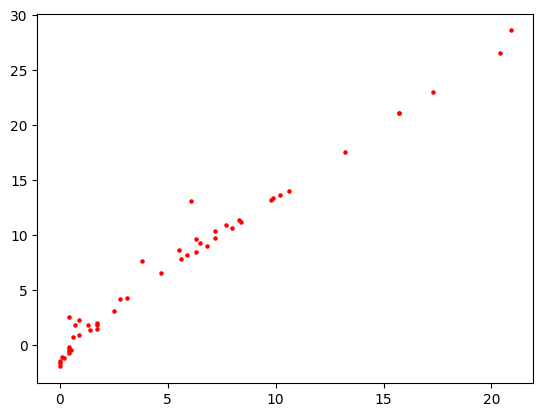

In [246]:
ridge=Ridge()
ridge.fit(x_train_scaled, y_train)
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred , color="red", s=5)

In [247]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,x_test)
y_pred=ridgecv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred , color="red", s=5)


ValueError: Found input variables with inconsistent numbers of samples: [194, 49]